In [68]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import yfinance as yf
import warnings
#stop warning
warnings.filterwarnings('ignore', category=FutureWarning)

# Stock Volatility

In [69]:
stock_df = yf.download(tickers='BTC-USD', start='2015-01-01', end='2023-02-20')

returns = 100 * stock_df.Close.pct_change().dropna()


[*********************100%***********************]  1 of 1 completed


Text(0.5, 1.0, 'Stock Returns')

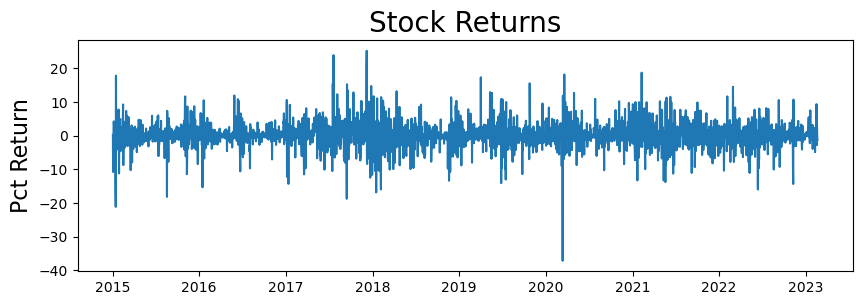

In [70]:
plt.figure(figsize=(10,3))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('Stock Returns', fontsize=20)

# PACF

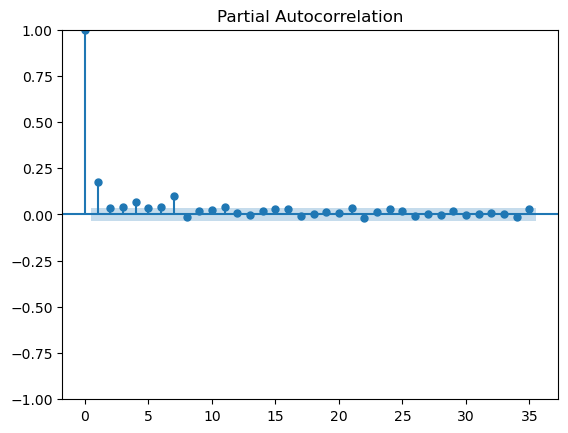

In [71]:

plot_pacf(returns**2)
plt.show()

# Fit GARCH(3,3)

In [72]:
model = arch_model(returns, p=3, q=3)


In [73]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 9131.071433899771
Iteration:      2,   Func. Count:     20,   Neg. LLF: 95828.92117414909
Iteration:      3,   Func. Count:     31,   Neg. LLF: 9987.058803895676
Iteration:      4,   Func. Count:     43,   Neg. LLF: 8137.881369564799
Iteration:      5,   Func. Count:     53,   Neg. LLF: 8055.424601603094
Iteration:      6,   Func. Count:     63,   Neg. LLF: 8114.771997724529
Iteration:      7,   Func. Count:     73,   Neg. LLF: 8025.278995942356
Iteration:      8,   Func. Count:     83,   Neg. LLF: 8103.764736642388
Iteration:      9,   Func. Count:     93,   Neg. LLF: 7960.9902856328445
Iteration:     10,   Func. Count:    103,   Neg. LLF: 7945.150814436862
Iteration:     11,   Func. Count:    113,   Neg. LLF: 7955.708791946071
Iteration:     12,   Func. Count:    123,   Neg. LLF: 7943.145802722903
Iteration:     13,   Func. Count:    133,   Neg. LLF: 7959.873582566868
Iteration:     14,   Func. Count:    143,   Neg. LLF: 7942.0094

In [74]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7941.91
Distribution:                  Normal   AIC:                           15899.8
Method:            Maximum Likelihood   BIC:                           15947.8
                                        No. Observations:                 2971
Date:                Tue, Feb 21 2023   Df Residuals:                     2970
Time:                        12:38:24   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2162  5.662e-02      3.819  1.341e-04 [  0.105,  0.327]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          1.0757      0.511      2.106  3.517e-02  [7.481e-02,  2.077]
alpha[1]       0.1923  5.118e-02      3.758  1.711e-04  [9.204e-02,  0.293]
alpha[2]   9.3683e-03      0.166  5.627e-02      0.955    [ -0.317,  0.336]
alpha[3]       0.0119      0.137  8.689e-02      0.931    [ -0.257,  0.281]
beta[1]        0.2542      0.685      0.371      0.710    [ -1.088,  1.596]
beta[2]    3.5692e-13      0.855  4.173e-13      1.000    [ -1.676,  1.676]
beta[3]        0.4737      0.244      1.940  5.242e-02 [-4.964e-03,  0.952]
===========================================================================

Covariance estimator: robust
"""

# Try GARCH(3,0) = ARCH(3)

In [75]:
model = arch_model(returns, p=3, q=0)

In [76]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 11627.30091799448
Iteration:      2,   Func. Count:     16,   Neg. LLF: 16755.440048507484
Iteration:      3,   Func. Count:     25,   Neg. LLF: 8580.898429068406
Iteration:      4,   Func. Count:     32,   Neg. LLF: 42341.012395044396
Iteration:      5,   Func. Count:     39,   Neg. LLF: 9490.203060430884
Iteration:      6,   Func. Count:     46,   Neg. LLF: 8139.7084798086635
Iteration:      7,   Func. Count:     53,   Neg. LLF: 8138.651293651557
Iteration:      8,   Func. Count:     60,   Neg. LLF: 8094.64110750788
Iteration:      9,   Func. Count:     67,   Neg. LLF: 8079.914525185146
Iteration:     10,   Func. Count:     73,   Neg. LLF: 8079.894204697757
Iteration:     11,   Func. Count:     79,   Neg. LLF: 8079.893985844303
Iteration:     12,   Func. Count:     85,   Neg. LLF: 8079.893933931353
Iteration:     13,   Func. Count:     90,   Neg. LLF: 8079.89393393104
Optimization terminated successfully    (Exit mode 0)
         

In [77]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8079.89
Distribution:                  Normal   AIC:                           16169.8
Method:            Maximum Likelihood   BIC:                           16199.8
                                        No. Observations:                 2971
Date:                Tue, Feb 21 2023   Df Residuals:                     2970
Time:                        12:38:41   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2624  6.018e-02      4.360  1.301e-05 [  0.144,  0.380]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          9.4371      1.205      7.829  4.916e-15   [  7.075, 11.800]
alpha[1]       0.1610  4.147e-02      3.882  1.035e-04 [7.971e-02,  0.242]
alpha[2]       0.1059  4.694e-02      2.256  2.404e-02 [1.392e-02,  0.198]
alpha[3]       0.1147  3.899e-02      2.942  3.261e-03 [3.828e-02,  0.191]
==========================================================================

Covariance estimator: robust
"""

In [78]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [79]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

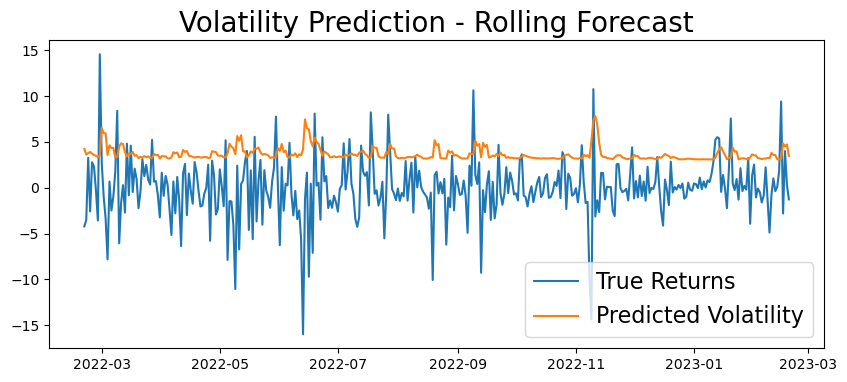

In [80]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# Fit GARCH(2,2)

In [81]:
model = arch_model(returns, p=2, q=2)

In [82]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 16075.924447686266
Iteration:      2,   Func. Count:     17,   Neg. LLF: 8768.721283014187
Iteration:      3,   Func. Count:     26,   Neg. LLF: 8239.278895574093
Iteration:      4,   Func. Count:     34,   Neg. LLF: 8374.68615238278
Iteration:      5,   Func. Count:     42,   Neg. LLF: 7985.106138161424
Iteration:      6,   Func. Count:     50,   Neg. LLF: 8538.858598308369
Iteration:      7,   Func. Count:     59,   Neg. LLF: 7979.905855547586
Iteration:      8,   Func. Count:     67,   Neg. LLF: 8027.739896171011
Iteration:      9,   Func. Count:     75,   Neg. LLF: 7956.505896535216
Iteration:     10,   Func. Count:     83,   Neg. LLF: 7953.58300354743
Iteration:     11,   Func. Count:     90,   Neg. LLF: 7969.472877457786
Iteration:     12,   Func. Count:     98,   Neg. LLF: 7953.050323978667
Iteration:     13,   Func. Count:    105,   Neg. LLF: 7952.983879774812
Iteration:     14,   Func. Count:    112,   Neg. LLF: 7952.961673

In [83]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7952.96
Distribution:                  Normal   AIC:                           15917.9
Method:            Maximum Likelihood   BIC:                           15953.9
                                        No. Observations:                 2971
Date:                Tue, Feb 21 2023   Df Residuals:                     2970
Time:                        12:39:06   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.2270  5.744e-02      3.952  7.735e-05 [  0.114,  0.340]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.7729      0.527      1.466      0.143   [ -0.260,  1.806]
alpha[1]       0.1420  4.740e-02      2.996  2.732e-03 [4.913e-02,  0.235]
alpha[2]   4.7103e-14      0.115  4.080e-13      1.000   [ -0.226,  0.226]
beta[1]        0.5595      0.344      1.627      0.104   [ -0.115,  1.234]
beta[2]        0.2551      0.247      1.032      0.302   [ -0.229,  0.740]
==========================================================================

Covariance estimator: robust
"""

# Rolling Forecast

In [90]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [91]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

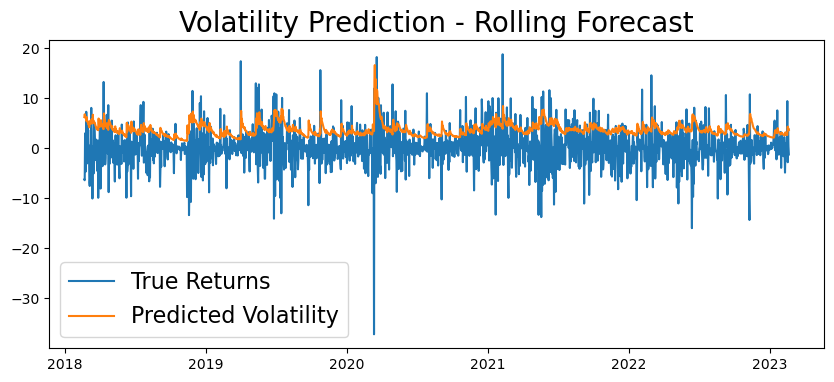

In [92]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [93]:
train = returns
model = arch_model(train, p=3, q=3)
model_fit = model.fit(disp='off')

In [94]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

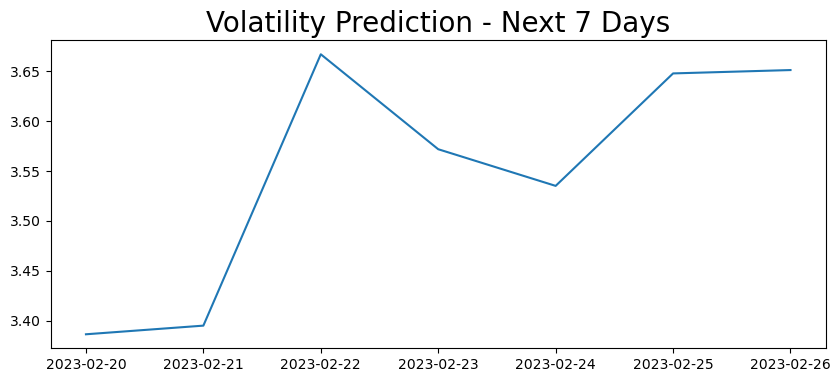

In [95]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)